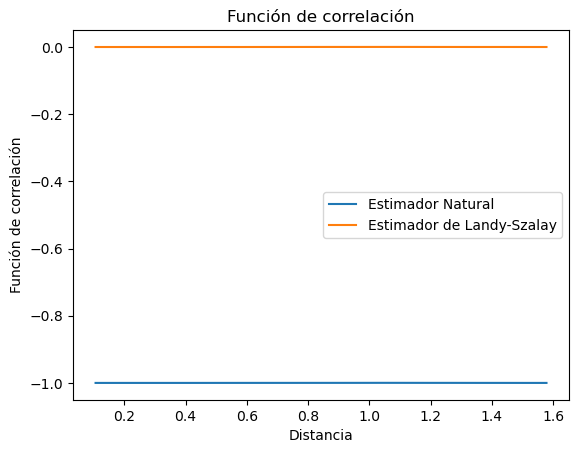

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def correlation_function(x, y, z, bins):
    # Calcular las distancias entre puntos
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Calcular la función de correlación usando el estimador natural
    counts, _ = np.histogram(r, bins=bins)
    n_pairs = len(r) * (len(r) - 1) / 2
    xi = counts / n_pairs - 1
    
    # Calcular la función de correlación usando el estimador de Landy-Szalay
    counts_rand, _ = np.histogram(np.random.uniform(size=len(r)) * np.max(r), bins=bins)
    n_pairs_rand = len(r) * len(r) / 2
    xi_ls = (counts - 2 * counts_rand) / n_pairs_rand
    
    bin_edges = np.linspace(np.min(r), np.max(r), bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, xi, xi_ls

# Generar datos de ejemplo
np.random.seed(0)
N = 1000
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)

# Calcular la función de correlación
bins = 20
r, xi, xi_ls = correlation_function(x, y, z, bins)

# Graficar la función de correlación
plt.plot(r, xi, label='Estimador Natural')
plt.plot(r, xi_ls, label='Estimador de Landy-Szalay')
plt.xlabel('Distancia')
plt.ylabel('Función de correlación')
plt.title('Función de correlación')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


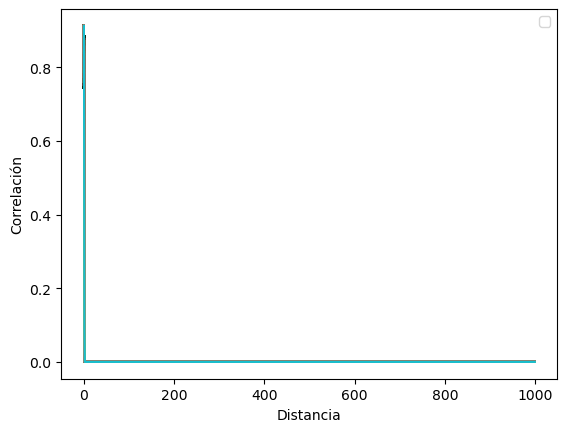

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la función de correlación
def correlation_function(data):
    # Calcula las distancias entre todos los puntos
    distances = np.sqrt(np.sum((data[:, np.newaxis, :] - data[np.newaxis, :, :]) ** 2, axis=-1))
    
    # Inicializa el arreglo para almacenar los conteos de pares
    counts = np.zeros_like(distances)
    
    # Calcula los conteos de pares para cada distancia
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            counts[int(distances[i, j])] += 1
    
    # Calcula la función de correlación
    n_pairs = len(data) * (len(data) - 1) / 2  # Número total de pares
    xi = counts / n_pairs
    
    return xi

# Generar los conjuntos de datos
real_data = np.random.rand(1000, 3)  # Datos reales
random_data = np.random.rand(1000, 3)  # Datos aleatorios

# Calcular la función de correlación para los datos reales
xi_real = correlation_function(real_data)

# Calcular la función de correlación para los datos aleatorios
xi_random = correlation_function(random_data)

# Preparar los valores de distancia para el eje x
distances = np.arange(len(xi_real))

# Graficar las funciones de correlación
plt.plot(distances, xi_real)
plt.plot(distances, xi_random)
plt.xlabel('Distancia')
plt.ylabel('Correlación')
plt.legend()
plt.show()
